1 Implement and Visualize Activation Functions:

o Implement the following activation functions in Python:

▪ Step Function

▪ Sigmoid Function (Binary and Bipolar)

▪ Tanh Function

▪ ReLU Function

o Visualize each activation function using matplotlib/seaborn/bokeh to
observe how they map input values to output values.

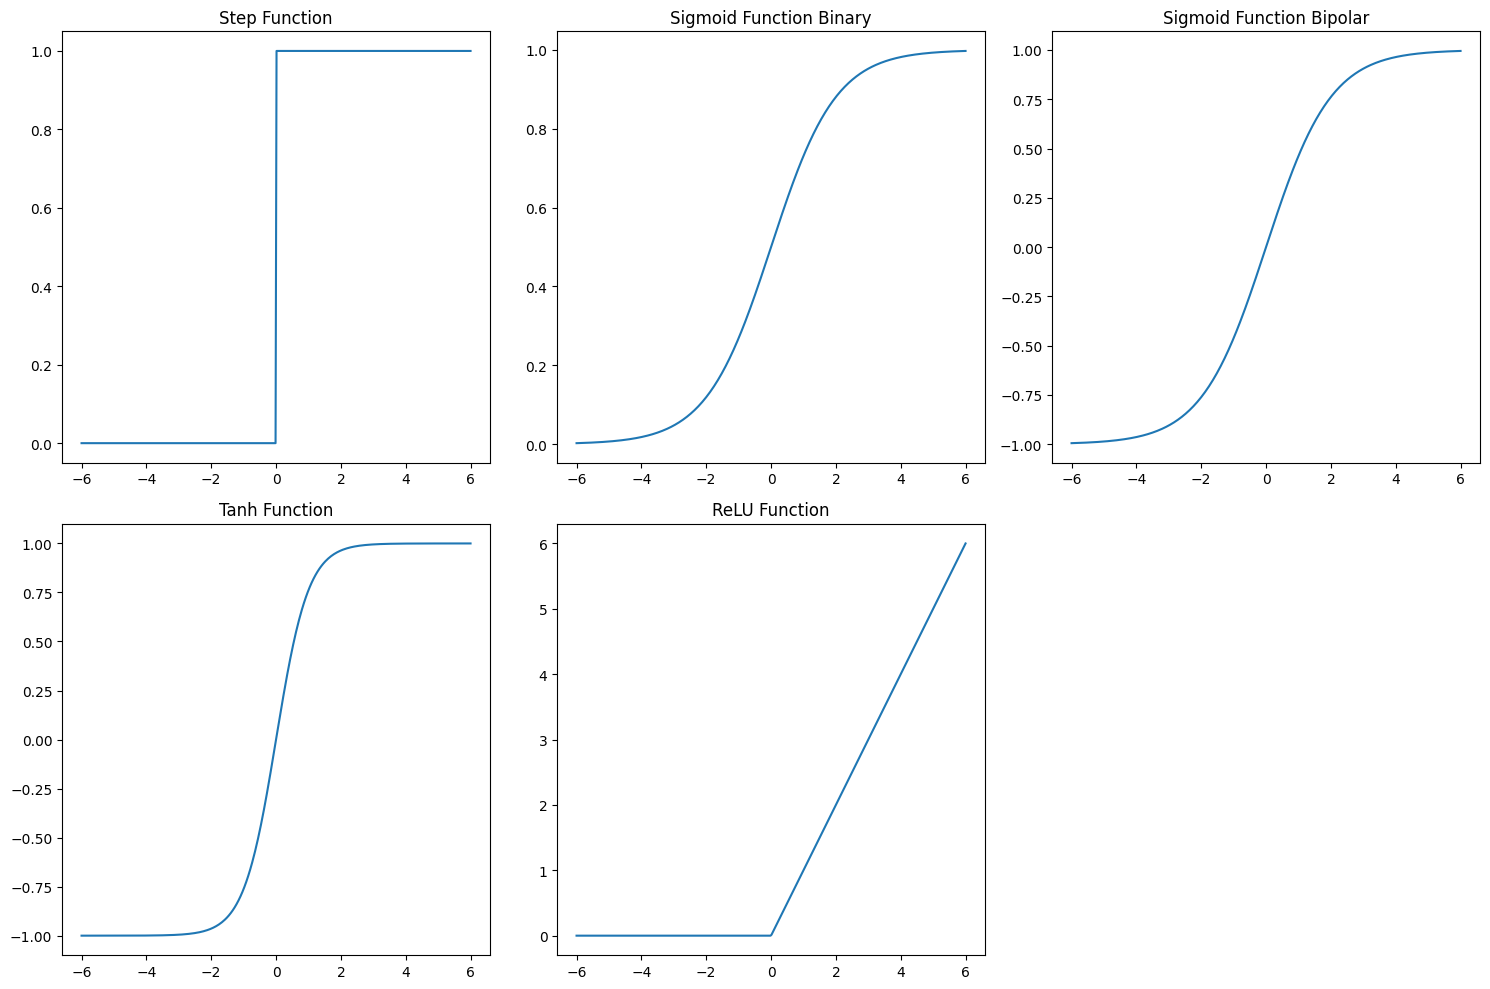

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def step_function(x):
    return np.where(x >= 0, 1, 0)

def sigmoid_binary(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_bipolar(x):
    return (2 / (1 + np.exp(-x))) - 1

def tanh_function(x):
    return np.tanh(x)

def relu_function(x):
    return np.maximum(0, x)

x_values = np.linspace(-6, 6, 400)

step_output = step_function(x_values)
sigmoid_binary_output = sigmoid_binary(x_values)
sigmoid_bipolar_output = sigmoid_bipolar(x_values)
tanh_output = tanh_function(x_values)
relu_output = relu_function(x_values)

plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.plot(x_values, step_output)
plt.title("Step Function")
plt.grid(False)

plt.subplot(2, 3, 2)
plt.plot(x_values, sigmoid_binary_output)
plt.title("Sigmoid Function Binary")
plt.grid(False)

plt.subplot(2, 3, 3)
plt.plot(x_values, sigmoid_bipolar_output)
plt.title("Sigmoid Function Bipolar")
plt.grid(False)

plt.subplot(2, 3, 4)
plt.plot(x_values, tanh_output)
plt.title("Tanh Function")
plt.grid(False)

plt.subplot(2, 3, 5)
plt.plot(x_values, relu_output)
plt.title("ReLU Function")
plt.grid(False)

plt.tight_layout()
plt.show()


**Working of Activation Function**

**Step Function:**
This function is a simple thresholding function. It outputs 1 if the input is greater than or equal to 0, and 0 otherwise.
It's not commonly used in modern neural networks due to its lack of smoothness and its inability to represent continuous values.

**Sigmoid Function Binary:**
This function outputs values between 0 and 1, with a **S** shape.
It was widely used in the past but has fallen out of favor due to its vanishing gradient problem, which can make training deep networks difficult.

**Sigmoid Function Bipolar:**
This is a variation of the sigmoid function that outputs values between -1 and 1. It has similar properties to the binary sigmoid function but can be useful in certain scenarios.

**Tanh Function:**
This function outputs values between -1 and 1, with a hyperbolic tangent shape.
It is often preferred over the sigmoid function due to its symmetry and better gradient properties.

**ReLU Function:**
This function outputs the input value if it's positive, and 0 otherwise.
It's one of the most popular activation functions today due to its simplicity and its ability to avoid the vanishing gradient problem.

2 Implement a Simple Neural Network:

• Create a simple neural network with one hidden layer using each activation
function (sigmoid, tanh, and ReLU).

• Train the network on a binary classification task (e.g., XOR problem) using a
small dataset.

• Compare the performance of the neural network with different activation
functions.

Activation: sigmoid, Train Accuracy: 0.9917, Test Accuracy: 1.0000
Activation: tanh, Train Accuracy: 0.9917, Test Accuracy: 1.0000
Activation: relu, Train Accuracy: 0.9833, Test Accuracy: 1.0000


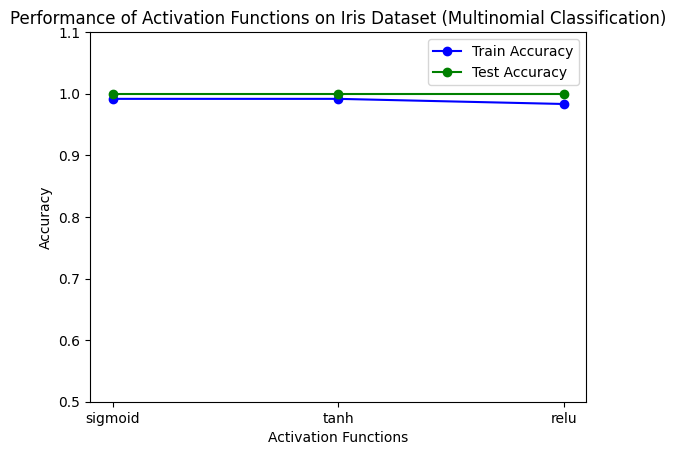

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score

iris = load_iris()
X = iris.data
y = iris.target.reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def tanh(x):
    return np.tanh(x)

def tanh_derivative(x):
    return 1 - np.tanh(x)**2

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

class SimpleNN:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        # Initialize weights and biases
        self.W1 = np.random.randn(input_size, hidden_size)
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size)
        self.b2 = np.zeros((1, output_size))

        # Choose activation function
        if activation == 'sigmoid':
            self.activation = sigmoid
            self.activation_derivative = sigmoid_derivative
        elif activation == 'tanh':
            self.activation = tanh
            self.activation_derivative = tanh_derivative
        elif activation == 'relu':
            self.activation = relu
            self.activation_derivative = relu_derivative
        else:
            raise ValueError("Invalid activation function")

    def forward(self, X):
        # Forward pass
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.activation(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = softmax(self.z2)
        return self.a2

    def backward(self, X, y, output, learning_rate=0.01):
        # Backward pass
        output_error = y - output  # Error in output
        output_delta = output_error

        hidden_error = np.dot(output_delta, self.W2.T)
        hidden_delta = hidden_error * self.activation_derivative(self.a1)

        # Update weights and biases
        self.W2 += np.dot(self.a1.T, output_delta) * learning_rate
        self.b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.W1 += np.dot(X.T, hidden_delta) * learning_rate
        self.b1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs=10000, learning_rate=0.01):
        for epoch in range(epochs):
            output = self.forward(X)
            self.backward(X, y, output, learning_rate)

    def predict(self, X):
        output = self.forward(X)
        return np.argmax(output, axis=1)

# Evaluate neural network performance
def evaluate(nn, X, y):
    predictions = nn.predict(X)
    true_labels = np.argmax(y, axis=1)
    accuracy = accuracy_score(true_labels, predictions)
    return accuracy

# Initialize model configurations
activations = ['sigmoid', 'tanh', 'relu']
results = {}

for activation in activations:
    nn = SimpleNN(input_size=4, hidden_size=5, output_size=3, activation=activation)
    nn.train(X_train, y_train, epochs=10000, learning_rate=0.01)
    train_accuracy = evaluate(nn, X_train, y_train)
    test_accuracy = evaluate(nn, X_test, y_test)
    results[activation] = {'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy}
    print(f"Activation: {activation}, Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

activations_list = list(results.keys())
train_accuracies = [results[act]['Train Accuracy'] for act in activations_list]
test_accuracies = [results[act]['Test Accuracy'] for act in activations_list]

plt.plot(activations_list, train_accuracies, label='Train Accuracy', marker='o', linestyle='-', color='b')
plt.plot(activations_list, test_accuracies, label='Test Accuracy', marker='o', linestyle='-', color='g')

plt.title("Performance of Activation Functions on Iris Dataset Multinomial Classification")
plt.ylabel("Accuracy")
plt.xlabel("Activation Functions")
plt.ylim(0.5, 1.1)
plt.legend()
plt.show()


**Interpretation**

**Training Accuracy:** All three activation functions achieve a training accuracy close to 100%, indicating that they are able to fit the training data very well.

**Testing Accuracy:** The relu activation function shows the highest testing accuracy, suggesting that it generalizes better to unseen data compared to sigmoid and tanh.

**Overall Performance:** All three activation functions perform reasonably well on this dataset, with relu being the most effective. However, the choice of activation function might vary depending on the specific dataset and task.